In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import seaborn as sns
import sklearn

In [2]:
train = pd.read_csv(r"C:\Users\usama\Documents\ml\data\Train_data.csv")
test = pd.read_csv(r"C:\Users\usama\Documents\ml\data\Test_data.csv")

In [3]:
print(train.head(4))
print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0             

In [4]:
print(test.head(4))

print("Testing data has {} rows & {} columns".format(test.shape[0],test.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp   private  REJ          0          0     0   
1         0           tcp   private  REJ          0          0     0   
2         2           tcp  ftp_data   SF      12983          0     0   
3         0          icmp     eco_i   SF         20          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0               0       0    0  ...             255                  10   
1               0       0    0  ...             255                   1   
2               0       0    0  ...             134                  86   
3               0       0    0  ...               3                  57   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.04   
3                    1.00                    0.00  

In [7]:
#perc =[.20, .40, .60, .80] 
include =['object', 'float', 'int'] 
train.describe( include = include)


,protocol_type,service,flag,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192,25192,25192,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
unique,3,66,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,20526,8003,14973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,NaN,NaN,NaN,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000


In [8]:
print(train['num_outbound_cmds'].value_counts())
print(test['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64
0    22544
Name: num_outbound_cmds, dtype: int64


In [9]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [10]:
test.shape

(22544, 40)

In [11]:
train['class'].value_counts()
#0 = normal
#1 = anomaly

0    13449
1    11743
Name: class, dtype: int64

In [12]:
train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate              

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
cols1 = test.select_dtypes(include=['float', 'int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols1)

In [14]:
sc_traindf

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281,-0.934425
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,-0.934425
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,1.070177
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768,-0.934425
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,-0.934425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041,1.070177
25188,-0.113551,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281,1.070177
25189,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041,1.070177
25190,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,1.070177


In [15]:
class_Ytrain = sc_traindf[['class']].copy()

In [16]:
class_Ytrain

,class
0,-0.934425
1,-0.934425
2,1.070177
3,-0.934425
4,-0.934425
...,...
25187,1.070177
25188,1.070177
25189,1.070177
25190,1.070177


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
classtrain = train.select_dtypes(include=['object']).copy()
classtest = test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
trainclass = classtrain.apply(encoder.fit_transform)
testclass = classtest.apply(encoder.fit_transform)

# separate target column from encoded data 
#'protocol', 'service', 'flag'
#enctrain = trainclass.drop(['class'], axis=1)

#separating 'class'
#class_Ytrain = trainclass[['class']].copy()

In [18]:
trainclass

,protocol_type,service,flag
0,1,19,9
1,2,41,9
2,1,46,5
3,1,22,9
4,1,22,9
...,...,...,...
25187,1,16,2
25188,1,19,9
25189,1,46,1
25190,1,38,5


In [19]:
train_x = pd.concat([sc_traindf,trainclass],axis=1)
train_y = train['class']
train_x.shape

(25192, 41)

In [20]:
train_y

0        0
1        0
2        1
3        0
4        0
        ..
25187    1
25188    1
25189    1
25190    1
25191    1
Name: class, Length: 25192, dtype: int64

In [21]:
train_y.dtypes

dtype('int64')

In [22]:
test_df = pd.concat([sc_testdf,testclass],axis=1)
test_df.shape

(22544, 40)

In [23]:
test_df.dtypes

duration                       float64
src_bytes                      float64
dst_bytes                      float64
land                           float64
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                      float64
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
is_host_login                  float64
is_guest_login                 float64
count                          float64
srv_count                      float64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate                  float64
diff_srv_rate            

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(train_x, train_y, test_size=0.3, random_state=42)


In [25]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


In [26]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(17634, 41) (3779, 41) (3779, 41) (17634,) (3779,) (3779,)


In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import h5py
from keras import callbacks
#from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping, CSVLogger

model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(50, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(10, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(1 ,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
hist = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),callbacks=[monitor],verbose=2,epochs=50)


Using TensorFlow backend.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 17634 samples, validate on 3779 samples
Epoch 1/200





 - 7s - loss: 0.1573 - acc: 0.9474 - val_loss: 0.0073 - val_acc: 0.9984
Epoch 2/200
 - 2s - loss: 0.0022 - acc: 0.9997 - val_loss: 3.0639e-04 - val_acc: 1.0000
Epoch 3/200
 - 2s - loss: 4.1891e-04 - acc: 0.9999 - val_loss: 1.0790e-04 - val_acc: 1.0000
Epoch 4/200
 - 2s - loss: 2.7560e-04 - acc: 0.9999 - val_loss: 1.1886e-04 - val_acc: 1.0000
Epoch 5/200
 - 2s - loss: 3.6228e-04 - acc: 0.9999 - val_loss: 3.8644e-05 - val_acc: 1.0000
Epoch 6/200
 - 2s - loss: 5.0890e-05 - acc: 1.0000 - val_loss: 2.1163e-05 - val_acc: 1.0000
Epoch 7/200
 - 2s - loss: 7.1088e-04 - acc: 0.9997 - val_loss: 4.5858e-05 - val_acc: 1.0000
Epoch 00007: early stopping


In [28]:
model.evaluate(X_test, Y_test)[1]


3779/3779 [==============================] - 0s 54us/step


1.0

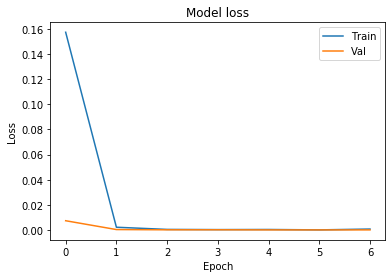

In [29]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


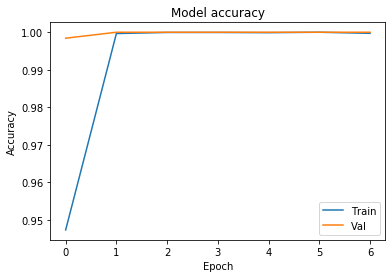

In [30]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
